# Animation Example

### Define library functions and classes (go into separate files later)

### Define maze drawing class

In [1]:
class create_maze:

  nx = None            # Number of squares in the grid horizontally
  ny = None            # Number of squares in the grid vertically
  ax = None            # plotting axes for maze
  maze_number = None   # True or False, controlling whether the maze is plotted
  pond_location = None # The pond will be centered at this grid location
  line_segments = []   # line segements defining the maze

  def __init__(self, ax, nx, ny, maze_number=False, pond_location=False):
    '''
    Creates a maze for plotting, technically we could call this a maze object.
    To use, you'll have to first create the maze, and then give the command to
    draw the maze,

    Parameters
    ----------
    ax : graphical/plotting axes, generated with
        fig, ax = plt.subplots()

    nx : integer
      Number of squares in the grid horizontally (in the x-dimension)

    ny : integer
      Number of squares in the grid vertically (in the y-dimension)

    maze_number : False or integer
      Controls which maze to plot
      If False, no maze is plotted.  If a number, then the maze corresponding to
      that number is plotted.

    pond_location :  False or grid coordinate (tuple)
      If False, then do not plot pond.  If a tuple like (12,12), then plot the
      pond at that location

    Returns
    -------
    A new maze for plotting (technicall, we call this a maze object)

    Example
    -------
    from matplotlib import pyplot as plt
    fig, ax = plt.subplots()
    nx = 14
    ny = 14
    maze_number = 1
    maze = create_maze(ax, nx, ny, maze_number)
    maze.draw()

    '''
    self.ax = ax
    self.nx = nx
    self.ny = ny
    self.maze_number = maze_number
    self.pond_location = pond_location
    self.line_segments = []

    if (self.maze_number != False):
      if (self.maze_number == 1):
        self.line_segments = self.generate_maze1()
      else:
        raise ValueError("Invalid Maze Number")

  def draw_line(self, point1, point2, linestyle):
    '''
    Draw a line from point1 to point 2

    Parameters
    ----------
    point1 : (x,y) pair   (technically called a tuple)
      Defines the first point for the line

    point1 : (x,y) pair   (technically called a tuple)
      Defines the second point for the line

    linestyle : 'light' or 'dark'
      Controls how dark and thick the line is

    Returns
    -------
    The plot corresponding to self.ax has a new line plotted in it
    '''
    if linestyle == 'light':
      self.ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color=(0.6, 0.6, 0.6), linewidth=1)
    elif linestyle == 'dark':
      self.ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color=(0.0, 0.0, 0.0), linewidth=3.5)
    else:
      print("No line drawn!  linestyle should be 'light' or 'dark' ")

  def draw_grid(self):
    '''
    Draw a background grid of size (nx, ny)

    Parameters
    ----------
    ax : graphical/plotting axes, generated with
        fig, ax = plt.subplots()

    nx : integer
      Number of squares in the grid horizontally (in the x-dimension)

    ny : integer
      Number of squares in the grid vertically (in the y-dimension)

    Returns
    -------
    The plot corresponding to self.ax has a background grid plotted on it
    '''
    import numpy as np

    # Plot all the vertical lines
    for i in np.arange(-0.5, self.nx, 1):
      point1 = (i, -0.5)
      point2 = (i, self.ny-0.5)
      self.draw_line(point1, point2, 'light')

    # Plot all the horizontal lines
    for j in np.arange(-0.5, self.ny, 1):
      point1 = (-0.5, j)
      point2 = (self.nx-0.5, j)
      self.draw_line(point1, point2, 'light')

  def draw_maze(self):
    '''
    Draw maze corresponding to the maze number given initially line_segments

    Parameters
    ----------
    None

    Returns
    -------
    The plot corresponding to self.ax has the maze plotted on it

    '''

    for seg in self.line_segments:
      point0 = seg[0]
      point1 = seg[1]
      self.draw_line(point0, point1, 'dark')

  def draw_pond(self):
    '''
    Draw pond at location (12,12)

    Parameters
    ----------
    None

    Returns
    -------
    The plot corresponding to self.ax has the pond plotted on it

    '''
    # Draw pond centered at self.pond_location with radius 1
    import numpy as np
    pond_x = self.pond_location[0]
    pond_y = self.pond_location[1]
    x = np.linspace(pond_x-1, pond_x+1, 100)
    y1 = np.sqrt(1 - (x - pond_x)**2) + pond_y
    y2 = -np.sqrt(1 - (x - pond_x)**2) + pond_y
    self.ax.fill_between(x, y1, y2, color=(0.1176, 0.5647, 1.0) )

  def draw(self):
    '''
    Draw the maze
    Note the maze drawn is the one specified when you first created this maze
    with create_maze(...)

    Parameters
    ----------
    None

    Returns
    -------
    The plot corresponding to self.ax has the maze plotted on it

    '''
    self.draw_grid()
    if self.pond_location != False:
      self.draw_pond()
    if self.maze_number != False:
      self.draw_maze()

  def generate_maze1(self):
    '''
    Generate Maze 1 using a stored design.  This simplest maze leads to the
    pond in a direct way.

    Parameters
    ----------

    Returns
    -------
    list of line segments to define maze
      Each list element, line_segments[k], contains two pieces of information
      Let  seg = line_segments[k], then seg defines a line segment.
      We have  (x0,y0) = seg[0]  and  (x1,y1) = seg[1].
      A line segment is drawn from (x0,y0) --> (x1,y1)

    '''
    segs = []
    segs.append( ((-0.5,  -0.5),  (5.5,   -0.5)) )  # maze part 1
    segs.append( ((-0.5,   0.5),  (4.5,    0.5)) )
    segs.append( ((5.5,  -0.5),     (5.5,    5.5)) )  # maze part 2
    segs.append( ((4.5,   0.5),     (4.5,    6.5)) )
    segs.append( ((5.5,   5.5),     (12.5, 5.5)) ) # maze part 3
    segs.append( ((4.5,   6.5),     (11.5, 6.5)) )
    segs.append( ((12.5,  5.5),   (12.5,  11.5)) ) # maze part 4
    segs.append( ((11.5,  6.5),   (11.5,  11.5)) )

    return segs

  # insert maze 2, 3, 4, and so on...

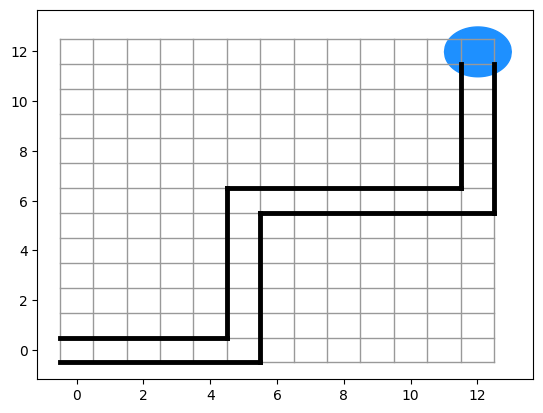

In [2]:
# Test code for verifying mazes
from matplotlib import pyplot as plt
fig, ax = plt.subplots()
nx = 13
ny = 13
maze_number = 1
maze = create_maze(ax, nx, ny, maze_number = 1, pond_location=(12,12))
maze.draw()

### Define turtle object, initializes animation, moves turtle and finalizes animation

In [3]:
class turtle_generator:

  nx = None             # Number of squares in the grid horizontally
  ny  = None            # Number of squares in the grid vertically
  start_location = None # The turtle starts at this grid location
  maze_number = None    # True or False, controlling whether the maze is plotted
  pond_location = None  # The pond will be centered at this grid location
  movements = None      # List of spatial locations for turtle to move through

  def __init__(self, nx=14, ny=14, start_location=(0,0), maze_number=False,
               pond_location=False):
    '''
    Creates a turtle object, can use other function to move it on the grid and
    plot the background grid and maze for the turtle to explore

    Parameters
    ----------

    nx : integer
      Number of squares in the grid horizontally (in the x-dimension)

    ny : integer
      Number of squares in the grid vertically (in the y-dimension)

    start_location : pair of numbers (technically called a tuple)
      This defines the starting location for the turtle, like (0,0), or (2,2)
      This location should be on the grid, and not outside the grid.

    maze_number : If maze_number is False, then no maze is plotted.
      If maze_number is a number (like 1 or 2), then the maze corresponding to
      that number is used and plotted

    pond_location : If pond_location is False, then no pond is plotted.
      If pond_location is a pair of numbers (technially called a tuple), then
      this defines the pond location on the grid, like (12, 12) or (5,6).
      This location should be on the grid, and not outside the grid.

    Returns
    -------
    A new turtle for moving around (technically, we call this a turtle object)

    Example
    -------
    turtle = turtle_generator()

    '''

    # Set nx: check that the user's desired nx value is a positive integer
    if (type(nx) == int) and (nx > 0):
      self.nx = nx
    else:
      self.nx = 14
      print("Invalid nx value given. nx should be a positive integer. Using default nx=14 instead")

    # Set ny: check that the user's desired ny value is a positive integer
    if (type(ny) == int) and (ny > 0):
      self.ny = ny
    else:
      self.ny = 14
      print("Invalid ny value given. ny should be a positive integer. Using default ny=14 instead")

    # Set start_location: check that user's desired start_location is a valid location on the grid
    if self.is_location_on_grid(start_location):
      self.start_location = start_location
    else:
      self.start_location = (0,0)
      print("Invalid start location given. start should be coordinates inside the grid like (0,0) or (2,2). Using default value (0,0) instead.")

    # Set maze_number: check that value is either False (for no maze) or a value maze number
    if (maze_number == False) or (maze_number == 1) or (maze_number == 2) or (maze_number == 3):
      self.maze_number = maze_number
    else:
      self.maze_number = False
      print("Invalid maze_number, should be either False (for no maze), or a supported maze number.  Currently, we support three mazes, maze_number = 1 or 2 or 3. Using default value False instead.")

    # Set pond_location: check that value is either False (for no pond) or a valid pond location
    if (pond_location == False) or self.is_location_on_grid(pond_location):
      self.pond_location = pond_location
    else:
      self.pond_location = False
      print("Invalid pond_location value, should be either False (for no pond), or coordinates inside the grid like (0,0) or (2,2). Using default value False instead.")

    # Set up plotting environment for animation
    import matplotlib.pyplot as plt
    plt.rcParams['figure.dpi'] = 80
    plt.rcParams["animation.html"] = "jshtml" # javascript html writer
    plt.ioff() # Turn interactive mode off
    plt.rcParams["figure.figsize"] = [7, 7]
    plt.rcParams["figure.autolayout"] = True

  def is_location_on_grid(self, location):
      '''
      Decide if location is a point on the grid.  First location is tested to
      see if it's a tuple, then to see if location is inside the grid

      Parameters
      ----------
      location : location is a pair of numbers (technially called a tuple),
      like (12, 12) or (5,6)

      Returns
      -------
      True or False (technically called a Boolean)
      True is returned if location is inside the grid
      False if the location is outside the grid
      '''
      if (type(location) == tuple)  and (len(location) == 2)       and \
        (type(location[0]) == int) and (type(location[1]) == int) and \
        (location[0] >= 0)          and (location[0] <= self.nx)    and \
        (location[1] >= 0)          and (location[1] <= self.ny):
        return True
      else:
        return False

  def download_turtle_image(self):
    '''
    This function should download a little image of a turtle into your current
    folder.  The turtle is used for our animations.

    Parameters
    ----------
    None

    Returns
    ------
    Downloads turtle image to current folder (i.e., present working directory)
    If there is a problem downloading, this function prints a message
    '''
    import subprocess
    import os
    result = subprocess.run(['curl -L "https://drive.google.com/uc?export=download&id=1LZBRk31Jan7yPgE44spPkxIK8rNc_dcU" > turtle.png;'], shell=True, capture_output=True)
    OK = os.path.isfile('./turtle.png')
    if(OK == False):
      print("Something went wrong with downloading turtle image")

  def start_new_journey(self):
    '''
    Get the turtle all ready to start a new journey beginning at the turtle's
    start location

    Parameters
    ----------
    None

    Returns
    -------
    The turtle is updated internally for a new journey beginning at
    the turtle's start location
    '''
    self.movements = [self.start_location]

  def move_left(self):
    '''
    Move turtle to the left by one square

    Parameters
    ----------
    None

    Returns
    -------
    This turtle's list of movements is modified by adding a new location at
    the end, such that the turtle will move one square to the left

    Example
    --------
    If       turtle.movements = [(2,2)]
    Then     turtle.move_left()
    Updates  turtle.movements = [(2,2), (1,2)]
    '''
    try:
      last_x, last_y = self.movements[-1]
      new_location = (last_x-1, last_y)
      if self.is_location_on_grid(new_location):
        self.movements.append(new_location)
      else:
        print("You tried to move off the grid to location " + str(new_location) + ".  Ignoring this move.")
    except:
      raise ValueError("You need to call start_new_journey first")

  def move_right(self):
    '''
    Move turtle to the right by one square

    Parameters
    ----------
    None

    Returns
    -------
    This turtle's list of movements is modified by adding a new location at
    the end, such that the turtle will move one square to the right

    Example
    --------
    If       turtle.movements = [(2,2)]
    Then     turtle.move_right()
    Updates  turtle.movements = [(2,2), (3,2)]
    '''
    try:
      last_x, last_y = self.movements[-1]
      new_location = (last_x+1, last_y)
      if self.is_location_on_grid(new_location):
        self.movements.append(new_location)
      else:
        print("You tried to move off the grid to location " + str(new_location) + ".  Ignoring this move.")
    except:
      raise ValueError("You need to call start_new_journey first")

  def move_up(self):
    '''
    Move turtle up by one square

    Parameters
    ----------
    None

    Returns
    -------
    This turtle's list of movements is modified by adding a new location at
    the end, such that the turtle will move one square up

    Example
    --------
    If       turtle.movements = [(2,2)]
    Then     turtle.move_up()
    Updates  turtle.movements = [(2,2), (2,3)]
    '''
    try:
      last_x, last_y = self.movements[-1]
      new_location = (last_x, last_y+1)
      if self.is_location_on_grid(new_location):
        self.movements.append(new_location)
      else:
        print("You tried to move off the grid to location " + str(new_location) + ".  Ignoring this move.")
    except:
      raise ValueError("You need to call start_new_journey first")

  def move_down(self):
    '''
    Move turtle down by one square

    Parameters
    ----------
    None

    Returns
    -------
    This turtle's list of movements is modified by adding a new location at
    the end, such that the turtle will move one square donw

    Example
    --------
    If       turtle.movements = [(2,2)]
    Then     turtle.move_down()
    Updates  turtle.movements = [(2,2), (2,1)]
    '''
    try:
      last_x, last_y = self.movements[-1]
      new_location = (last_x, last_y-1)
      if self.is_location_on_grid(new_location):
        self.movements.append(new_location)
      else:
        print("You tried to move off the grid to location " + str(new_location) + ".  Ignoring this move.")
    except:
      raise ValueError("You need to call start_new_journey first")

  def show_starting_position(self):
    '''
    Plot the turtle on the starting grid, no animation, just show how everything starts

    Parameters
    ----------
    None

    Returns
    -------
    A plot is made showing the turtle at it's starting position
    '''
    %matplotlib inline
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox

    # Create our blank plot
    fig, ax = plt.subplots()

    # Download turtle image for plotting, and then load that image into Python
    self.download_turtle_image()
    image = OffsetImage(plt.imread('./turtle.png', format="png"), zoom=0.1)

    ab = AnnotationBbox(image, self.start_location, frameon=False)
    ax.add_artist(ab)

    # Create maze and draw it
    maze = create_maze(ax, self.nx, self.ny, self.maze_number, self.pond_location)
    maze.draw()

    # Add axes ticks
    plt.xticks(range(self.nx), fontsize=15)
    plt.yticks(range(self.ny), fontsize=15)

  def watch_me_move(self):
    '''
    Finalize and create animation

    Paramters
    --------
    None

    Returns
    --------
    anim : animation object
      anim stores a full, complete animation

    Example
    -------
    Let turtle.movements = [(2,2), (3,3)]
    Then the animation will be a turtle that goes from square (2,2) to
    square (3,3) on the grid
    '''
    import matplotlib.pyplot as plt
    import numpy as np
    from matplotlib.offsetbox import OffsetImage, AnnotationBbox
    import matplotlib.animation

    # Check that we have actual movements to plot
    if (not hasattr(self, 'movements')) or (self.movements == []):
      print("You don't have any movements yet!\n Try doing\n turtle.start_new_journey(), followed by some movements like\n turtle.move_up()")
      return

    # Create our blank plot
    fig, ax = plt.subplots()

    # Download turtle image for plotting, and then load that image into Python
    self.download_turtle_image()
    image = OffsetImage(plt.imread('./turtle.png', format="png"), zoom=0.1)

    # Define helper function for animation, which draws each animation frame
    def animate(t):
      plt.cla()
      ab = AnnotationBbox(image, self.movements[t], frameon=False)
      ax.add_artist(ab)

      # Create maze and draw it
      maze = create_maze(ax, self.nx, self.ny, self.maze_number, self.pond_location)
      maze.draw()

      # Add axes ticks
      plt.xticks(range(self.nx), fontsize=15)
      plt.yticks(range(self.ny), fontsize=15)

    #ax.axis('equal')
    anim = matplotlib.animation.FuncAnimation(fig, animate, frames=len(self.movements), interval=400, repeat=False)

    return anim




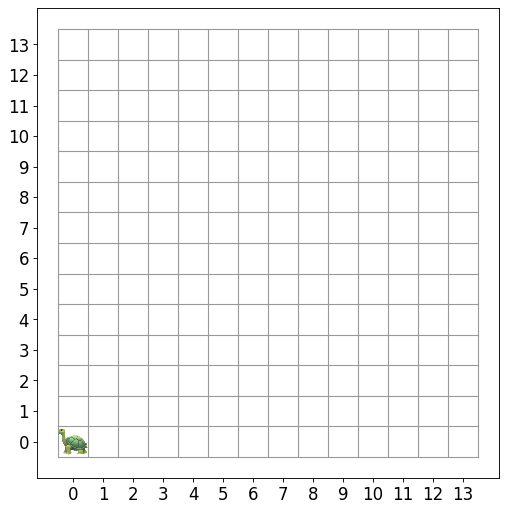

In [4]:
# Experiment with default
turtle0 = turtle_generator()
turtle0.show_starting_position()

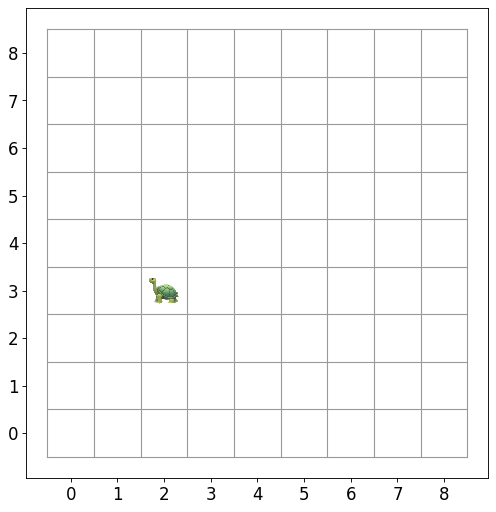

In [5]:
# Experiment with different grid size and starting location
turtle1 = turtle_generator(nx=9, ny=9, start_location=(2,3))
turtle1.show_starting_position()

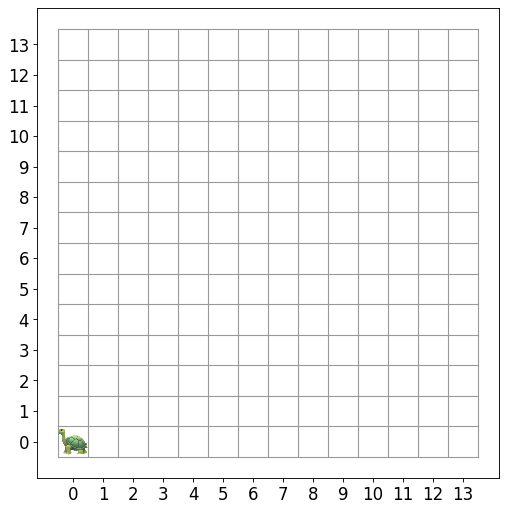

In [6]:
# Go back to default (make sure all internal variables return to where they should be)
turtle2 = turtle_generator(nx=14, ny=14, start_location=(0,0))
turtle2.show_starting_position()

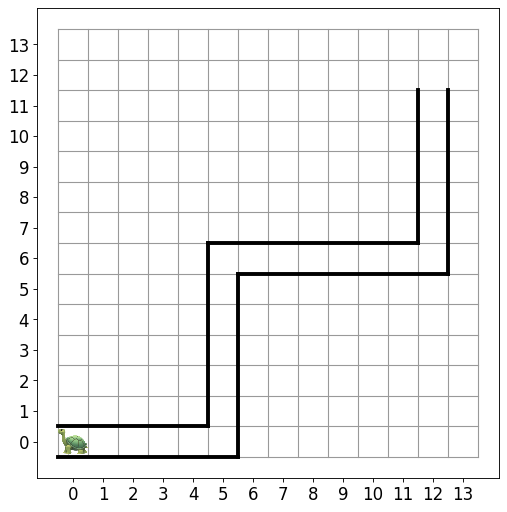

In [7]:
# Experiment with valid maze numbers
turtle3 = turtle_generator(nx=14, ny=14, start_location=(0,0), maze_number=1)
turtle3.show_starting_position()

Invalid maze_number, should be either False (for no maze), or a supported maze number.  Currently, we support three mazes, maze_number = 1 or 2 or 3. Using default value False instead.


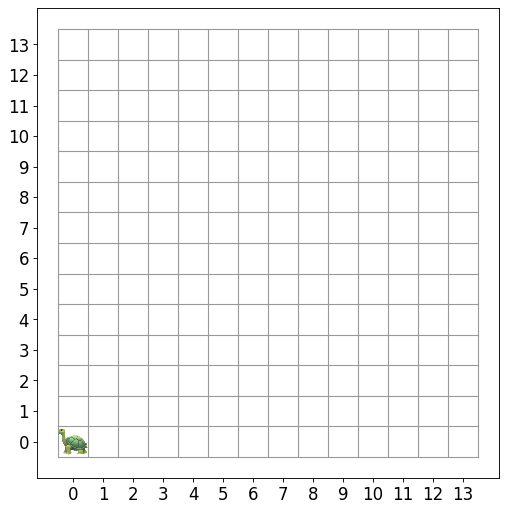

In [8]:
# Experiment with some invalid maze numbers
# --> Make sure error checking is working OK
turtle4 = turtle_generator(nx=14, ny=14, start_location=(0,0), maze_number=-1)
turtle4.show_starting_position()

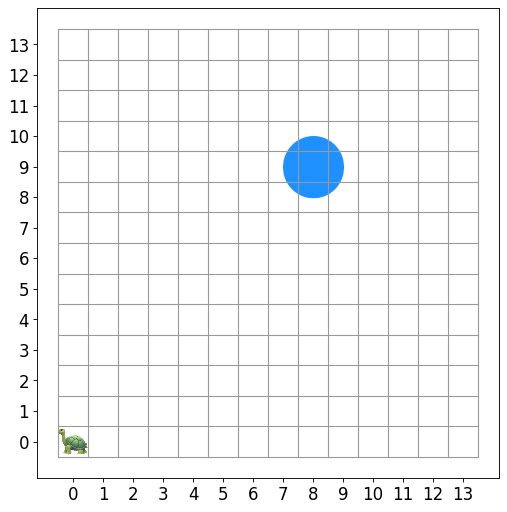

In [9]:
# Experiment with some valid pond_locations inside grid
turtle5 = turtle_generator(nx=14, ny=14, start_location=(0,0), pond_location=(8,9))
turtle5.show_starting_position()

Invalid pond_location value, should be either False (for no pond), or coordinates inside the grid like (0,0) or (2,2). Using default value False instead.


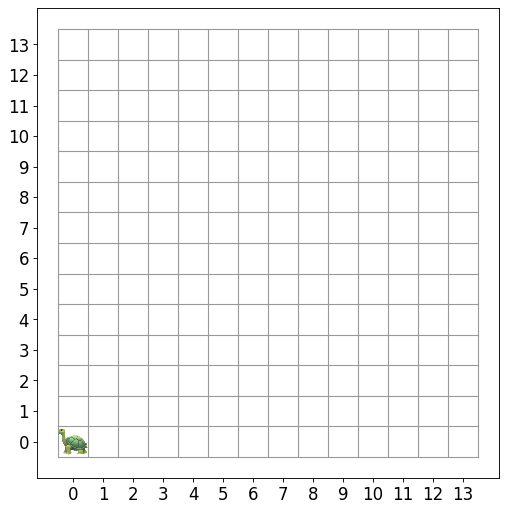

In [10]:
# Experiment with some invalid pond_locations, i.e., not tuples and locations outside grid
# --> Make sure error checking is working OK
turtle6 = turtle_generator(nx=14, ny=14, start_location=(0,0), pond_location=(-4,9))
turtle6.show_starting_position()

In [11]:
# Experiment with animations, test that you have to initialize first
turtle7 = turtle_generator(nx=14, ny=14, start_location=(0,0))
turtle7.move_left()

ValueError: ignored

In [12]:
# Experiment with animations, no pond, no maze, just moving around
# --> Try moving off grid
turtle8 = turtle_generator(nx=14, ny=14, start_location=(0,0))
turtle8.start_new_journey()
turtle8.move_down()

You tried to move off the grid to location (0, -1).  Ignoring this move.


In [13]:
# Experiment with animations, no pond, no maze, just moving around
# --> Try moving off grid
turtle9 = turtle_generator(nx=14, ny=14, start_location=(0,0))
turtle9.start_new_journey()
turtle9.move_right(); turtle9.move_right(); turtle9.move_right(); turtle9.move_right(); turtle9.move_right(); turtle9.move_right(); turtle9.move_right()
turtle9.move_right(); turtle9.move_right(); turtle9.move_right(); turtle9.move_right(); turtle9.move_right(); turtle9.move_right(); turtle9.move_right()
turtle9.move_right()

You tried to move off the grid to location (15, 0).  Ignoring this move.


In [14]:
# Experiment with animations, no pond, no maze, just moving around
# --> Try moving off grid
turtle10 = turtle_generator(nx=14, ny=14, start_location=(0,0))
turtle10.start_new_journey()
turtle10.move_left()

You tried to move off the grid to location (-1, 0).  Ignoring this move.


In [15]:
# Experiment with animations, no pond, no maze, just moving around
# --> Try moving off grid
turtle11 = turtle_generator(nx=14, ny=14, start_location=(0,0))
turtle11.start_new_journey()
turtle11.move_up(); turtle11.move_up(); turtle11.move_up(); turtle11.move_up(); turtle11.move_up(); turtle11.move_up(); turtle11.move_up()
turtle11.move_up(); turtle11.move_up(); turtle11.move_up(); turtle11.move_up(); turtle11.move_up(); turtle11.move_up(); turtle11.move_up()
turtle11.move_up()

You tried to move off the grid to location (0, 15).  Ignoring this move.


In [16]:
# Experiment with animations, no pond, no maze, just moving around
# --> Try moving off grid
turtle12 = turtle_generator(nx=14, ny=14, start_location=(0,0))
turtle12.start_new_journey()
turtle12.move_up()
turtle12.move_up()
turtle12.move_right()
turtle12.move_right()
turtle12.move_down()
turtle12.move_left()
turtle12.watch_me_move()

In [17]:
# Now have turtle navigate to pond
turtle13 = turtle_generator(nx=14, ny=14, start_location=(0,0), pond_location=(12,12))
turtle13.start_new_journey()
turtle13.move_up()
turtle13.move_up()
turtle13.move_up()
turtle13.move_up()
turtle13.move_up()
turtle13.move_up()
turtle13.move_up()
turtle13.move_up()
turtle13.move_up()
turtle13.move_up()
turtle13.move_right()
turtle13.move_right()
turtle13.move_right()
turtle13.move_right()
turtle13.move_right()
turtle13.move_right()
turtle13.move_right()
turtle13.move_right()
turtle13.move_right()
turtle13.move_right()
turtle13.move_up()
turtle13.move_up()
turtle13.move_right()
turtle13.move_right()
turtle13.watch_me_move()

In [18]:
# Now have turtle navigate maze to pond
turtle14 = turtle_generator(nx=14, ny=14, start_location=(1,0), maze_number=1,  pond_location=(12,12))
turtle14.start_new_journey()
turtle14.move_right()
turtle14.move_right()
turtle14.move_right()
turtle14.move_right()
turtle14.move_up()
turtle14.move_up()
turtle14.move_up()
turtle14.watch_me_move()




# THIS IS WHERE LIBRARY FUNCTIONS END AND STUDENT CODE BEGINS
# THIS MATERIAL WILL GO IN A SEPARATE FILE
-------------------------

# TURTLE LAB 1: MOVE TURTLE AROUND SCREEN

**Learning Goals**
- Create a new turtle
  1. This new variable is also called an "object"
  1. Objects have lots of things inside them that let us use their capabilities

- These capabilities are called "functions"
  1. These functions define what the turtle can do, like can the turtle move up or move down, or can the turtle display itself, so we can see it?

- Learn how to use some of these capabilities to move the turtle around and visualize those movements with an animation
  1. Use turtle function `turtle.show_starting_position()` to see the turtle's starting position.
  1. Use turtle functions to move, like, `turtle.move_up()`, `turtle.move_down()`, `turtle.move_right()`, or `turtle.move_left()` to describe where you want the turtle to go
  1. Finally watch the animation with `turtle.watch_me_move()`

First, we have to create a new turtle.  
- Note, that we have to add parentheses.  
  -Later, we will put values in those parentheses to tell the `turtle_generator` that we want a pond or a maze.

In [4]:
turtle1 = turtle_generator()

Next, we just take a look at our turtle and where it is

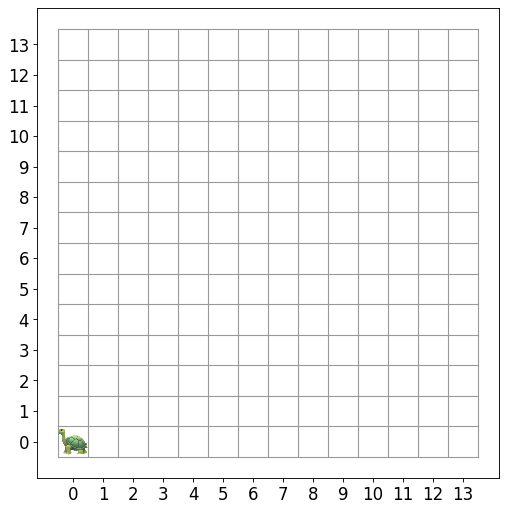

In [5]:
turtle1.show_starting_position()

Next, we have to tell our turtle to get ready for a trip with `turtle1.start_new_journey()`

In [6]:
turtle1.start_new_journey()

Next, tell your turtle where to move!

In [7]:
turtle1.move_up()
turtle1.move_right()
turtle1.move_down()
turtle1.move_left()

Finally, we look at the turtle moving

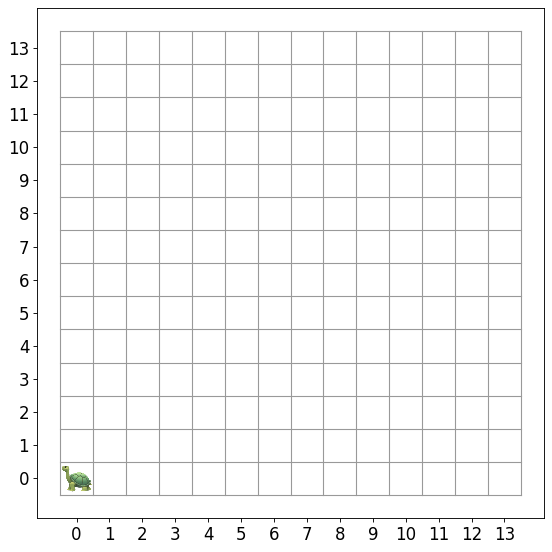

In [8]:
turtle1.watch_me_move()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**TASK**
- Go back up and click to run the `move` commands again.
- Then click to run the `turtle1.watch_me_move()`
- What happens?  Does the turtle do more than one circle now?
- Next click to run the `turtle.start_new_journey()` command, followed by clicking to run the `move` commands and then the `turtle1.watch_me_move()` command.
- This should make the turtle do one circle again.

**TASK** Change the above movements so that your turtle moves in a really large circle.  The turtle currently moves in a small circle.  Make sure to return the turtle to it's starting location

**[ divide into multiple files here]**

------------------------


**Should lab 1 be broken up? Or can it be broken up reasonably?**

**Have reinforce list knowledge inspect list, etc... in future labs**

For other lab
**TASK** Next, print the list `movement` to the screen. Describe what you see.

For other lab
**TASK** Learn about return values with the anim value from turtle.watch_me_move()
- **Review** how functions can give you back important stuff (called return value)


**Old first lab learning goals
- How to import matplotlib from Visual Python (or by typing it by hand)
- Lists, and appending new list entries
- What is a function and using it to do something.

  Here are some of the functions you will be using.
  1. First, you will download the turtle graphic with the function `download_turtle_image()`
  1. Next, use function `initialize animation()` to set up animation
  1. Next, use turtle functions to move, like, `turtle.move_up()`, `turtle.move_down()`, `turtle.move_right()`, or `turtle.move_left()` to describe where you want the turtle to go
  1. Finally get the animation variable `anim` as a return value from `turtle.finalize_animation()`


**-->Suggest inserting new lab here to reinforce lab 1**
  - Have them print out the list movement to reinforce list understanding
  - Have them generate identical movement lists by (i) executing code blocks multiple times, and then printing the list and generating an animation, and (ii) by just executing movement commands more times, and then printing the list and generating an animation
  - Main learning goals are understanding lists better and connecting those to the stored movements
  - Also have them try running something without movement initialized...get error

------------------------------------

# TURTLE LAB 2: MOVE TURTLE TO POND AND BACK TO WHERE YOU STARTED

**Learning Goals**
- Everything from lab 1
- How to plan a route and implement it
  - Start thinking algorithmically: plan a route and then implement it
- Giving information to functions, so that you can control what the function does
  - This is called *passing a parameter* to a function
  - A parameter is just a fancy word for a value that you give a function, telling that function what you want
  - Here, we will tell `turtle_generator()` to give us a pond and to change the starting location with parameters

First, we have to create a new turtle.
- But, we now give `turtle_generator()` a parameter telling it to give us a pond
- The pond is centered at the grid location (12,12)

In [19]:
turtle1 = turtle_generator( pond_location=(12,12) )

!!! PICK UP WRITING LAB HERE, visualize with
turtle4.show_starting_position()

Task them to move pond around

Task them to move turtle to pond and leave turtle in pond

Then, have them change the starting position

Next, we have to tell our turtle to get ready for a trip with `turtle1.start_new_journey()`

In [ ]:
turtle1.start_new_journey()

Next, tell your turtle where to move!

In [ ]:
turtle1.move_up()
turtle1.move_right()
turtle1.move_down()
turtle1.move_left()

Finally, we look at the turtle moving

In [ ]:
turtle1.watch_me_move()

In [14]:
download_turtle_image()

Now, we can start work on the animation.

Let's first initialize some of our graphics and plotting environment

In [15]:
initialize_animation()

Next, we set up our list of turtle movements
- **Review** lists and how they work

In [16]:
movement = []
movement.append((2,2))

Next, tell your turtle where to move!
- Remember: each time you move, you have to give `movements` to the functions `move_up()`, `move_down()`, `move_right()`, and `move_left()`
  - `movements` is called a parameter to the function
  - The function (`move_up()`, `move_down()`, `move_right()`, or `move_left()`) modifies and changes `movements` to record and track each new square the turtle goes to

**TASK:** modify the below movements to get your turtle to the pond

In [17]:
move_up(movement)
move_up(movement)
move_right(movement)
move_right(movement)
move_down(movement)
move_left(movement)
move_up(movement)
move_down(movement)
move_down(movement)


Next, we give our list of `movements` to the animation generator
- **New:** we are turning on pond by giving that as a new parameter to `finalize_animation()`
- Remember: how finalize_animation needs `movements` to generate animation
- Remember: how functions  give you back important stuff, like the `anim` variable which contains the animation
- Here, `finalize_animation()` gives you back an animation variable

In [18]:
anim = finalize_animation(movement, pond=True)

Finally, we look at the animation by running our animation variable

In [19]:
anim

**Should we insert a lab here to reinforce anything else?**

**[ Divide into multiple files here ]**

-----------------------------

# TURTLE LAB 3:
#(1) MOVE TURTLE THROUGH MAZE TO POND AND
#(2) MOVE TURTLE BACK TO WHERE YOU STARTED

**Learning Goals**
- Everything from lab 1 and from lab 2
- More advanced route planning
  - Staying within the maze lines
  - Taking the smallest number of steps
  - Algorithmic thinking: plan a route and then implement it
- How to use `finalize_animation()` with a new parameter
  - That is, turn on the maze 1

In [20]:
## Visual Python: Data Analysis > Import
import matplotlib.pyplot as plt
%matplotlib inline

Need to download image of turtle for animations

In [21]:
download_turtle_image()

Now, we can start work on the animation.

Let's first initialize some of our graphics and plotting environment

In [22]:
initialize_animation()

Next, we set up our list of turtle movements
- We now place the turtle at the maze start at the origin, (0,0)


In [23]:
movement = []
movement.append((0,0))

Next, tell your turtle where to move!
- Remember: each time you move, you have to give `movements` to the functions `move_up()`, `move_down()`, `move_right()`, and `move_left()`
  - `movements` is called a parameter to the function
  - The function (`move_up()`, `move_down()`, `move_right()`, or `move_left()`) modifies and changes `movements` to record and track each new square the turtle goes to

**TASK:** Stay within the maze, and move your turtle to the pond and back to where it started, at the origin.  Use the smallest number of movements possible.

In [24]:
move_right(movement)
move_right(movement)
move_right(movement)


Next, we give our list of `movements` to the animation generator
- **New:** we are turning on the `maze`, in addition to turning on `pond`
- Remember: how finalize_animation needs `movements` to generate animation
- Remember: how functions  give you back important stuff, like the `anim` variable which contains the animation
- Here, `finalize_animation()` gives you back an animation variable

In [25]:
anim = finalize_animation(movement, pond=True, maze=1)

Finally, we look at the animation by running our animation variable

In [26]:
anim